In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [1]:
from urllib.request import urlretrieve
from pathlib import Path


!gdown https://amazon-massive-nlu-dataset.s3.amazonaws.com/amazon-massive-dataset-1.0.tar.gz
!tar -xvf /content/amazon-massive-dataset-1.0.tar.gz


Downloading...
From: https://amazon-massive-nlu-dataset.s3.amazonaws.com/amazon-massive-dataset-1.0.tar.gz
To: /content/amazon-massive-dataset-1.0.tar.gz
100% 39.5M/39.5M [00:04<00:00, 8.34MB/s]
1.0/
1.0/CITATION.md
1.0/NOTICE.md
1.0/data/
1.0/data/mn-MN.jsonl
1.0/data/af-ZA.jsonl
1.0/data/el-GR.jsonl
1.0/data/ta-IN.jsonl
1.0/data/ar-SA.jsonl
1.0/data/ur-PK.jsonl
1.0/data/pl-PL.jsonl
1.0/data/ko-KR.jsonl
1.0/data/az-AZ.jsonl
1.0/data/da-DK.jsonl
1.0/data/kn-IN.jsonl
1.0/data/tl-PH.jsonl
1.0/data/is-IS.jsonl
1.0/data/lv-LV.jsonl
1.0/data/it-IT.jsonl
1.0/data/es-ES.jsonl
1.0/data/fr-FR.jsonl
1.0/data/ml-IN.jsonl
1.0/data/km-KH.jsonl
1.0/data/fa-IR.jsonl
1.0/data/sw-KE.jsonl
1.0/data/en-US.jsonl
1.0/data/tr-TR.jsonl
1.0/data/bn-BD.jsonl
1.0/data/he-IL.jsonl
1.0/data/te-IN.jsonl
1.0/data/pt-PT.jsonl
1.0/data/ka-GE.jsonl
1.0/data/ja-JP.jsonl
1.0/data/id-ID.jsonl
1.0/data/ru-RU.jsonl
1.0/data/hy-AM.jsonl
1.0/data/nb-NO.jsonl
1.0/data/ms-MY.jsonl
1.0/data/sq-AL.jsonl
1.0/data/sv-SE.jsonl
1.0/

In [4]:
import json
import re
from collections import defaultdict
import random

def parse_line(item):
    utt = item['utt']
    annot_utt = item['annot_utt']
    intent = item['intent']

    tokens = utt.split()
    labels = ['O'] * len(tokens)

    if annot_utt:
        annotations = re.findall(r'\[(.*?)\s*:\s*(.*?)\]', annot_utt)
        for slot_type, slot_value in annotations:
            for i, token in enumerate(tokens):
                if token == slot_value.split()[0]:  # Assuming first word match
                    start = i
                    for j, sub_token in enumerate(slot_value.split()):
                        if i + j < len(tokens) and tokens[i + j] == sub_token:
                            labels[i + j] = f"{('B' if j == 0 else 'I')}-{slot_type}"

    return ' '.join([f"{token}:{label}" for token, label in zip(tokens, labels)]), intent

def split_data(data):
    random.shuffle(data)
    train_size = int(0.8 * len(data))
    val_size = int(0.1 * len(data))
    train_data = data[:train_size]
    val_data = data[train_size:train_size + val_size]
    test_data = data[train_size + val_size:]
    return train_data, val_data, test_data

def create_txt_files(train_data, val_data, test_data,lang):
    for filename, data_set in [(lang+'train.txt', train_data), (lang+'valid.txt', val_data), (lang+'test.txt', test_data)]:
        with open(filename, 'w', encoding='utf-8') as f:
            for item in data_set:
                parsed_line, intent = parse_line(item)
                f.write(f"{parsed_line} <=> {intent}\n")

def create_vocab_files(data, lang):
    intents = set()
    slots = set()

    for item in data:
        intents.add(item['intent'])
        if item['annot_utt']:
            annotations = re.findall(r'\[(.*?)\s*:\s*(.*?)\]', item['annot_utt'])
            for slot_type, _ in annotations:
                slots.add(f"B-{slot_type}")
                slots.add(f"I-{slot_type}")

    slots.add('O')  # Add 'O' for outside of any slot

    with open(lang+'vocab.intent', 'w', encoding='utf-8') as f:
        for intent in sorted(intents):
            f.write(f"{intent}\n")

    with open(lang+'vocab.slot', 'w', encoding='utf-8') as f:
        for slot in sorted(slots):
            f.write(f"{slot}\n")

if __name__ == "__main__":
    fa_data_path = "/content/1.0/data/fa-IR.jsonl"  # Replace with actual path

    with open(fa_data_path, 'r', encoding='utf-8') as f:
        fa_data = [json.loads(line) for line in f]

    # Filter out items without intent or annotation if necessary
    fa_data = [item for item in fa_data if item.get('intent') and item.get('annot_utt')]

    train_data, val_data, test_data = split_data(fa_data)

    create_txt_files(train_data, val_data, test_data,'fa_')
    create_vocab_files(fa_data,'fa_')

    print("Files created for persian lang : train.txt, valid.txt, test.txt, vocab.intent, vocab.slot")

    ##############################################
    en_data_path = "/content/1.0/data/en-US.jsonl"  # Replace with actual path

    with open(en_data_path, 'r', encoding='utf-8') as f:
        en_data = [json.loads(line) for line in f]

    # Filter out items without intent or annotation if necessary
    en_data = [item for item in en_data if item.get('intent') and item.get('annot_utt')]

    train_data, val_data, test_data = split_data(en_data)

    create_txt_files(train_data, val_data, test_data,'en_')
    create_vocab_files(en_data,'en_')

    print("Files created for eglish lang: train.txt, valid.txt, test.txt, vocab.intent, vocab.slot")

Files created for persian lang : train.txt, valid.txt, test.txt, vocab.intent, vocab.slot
Files created for eglish lang: train.txt, valid.txt, test.txt, vocab.intent, vocab.slot


In [2]:
from pathlib import Path
lines_train = Path("/content/en_train.txt").read_text("utf-8").strip().splitlines()
lines_train[:5]

["when's:O the:O next:O train:B-transport_type to:O cornwall:B-place_name <=> transport_query",
 'in:O jaipur:B-place_name traffic:O level:O is:O high:O <=> transport_traffic',
 'where:O is:O botswana:B-place_name <=> qa_factoid',
 'please:O purchase:O a:O train:B-transport_type ticket:O for:O this:O weekend:B-time <=> transport_ticket',
 'jokes:O <=> general_joke']

In [3]:
import re

def parse_line(line):
    utterance_data, intent_label = line.split(" <=> ")
    items = utterance_data.split()
    words = []
    labels = []

    for item in items:
        split_item = item.rsplit(":", 1)
        if len(split_item) == 2:  # If there is a colon in the item
            words.append(split_item[0])
            labels.append(split_item[1])
        else:
            # If no colon, treat as 'O'
            words.append(item)
            labels.append('O')

    return {
        "intent_label": intent_label.strip(),
        "words": " ".join(words),
        "word_labels": " ".join(labels),
        "length": len(words),
    }

In [4]:
parse_line(lines_train[0])

{'intent_label': 'transport_query',
 'words': "when's the next train to cornwall",
 'word_labels': 'O O O B-transport_type O B-place_name',
 'length': 6}

In [5]:
##print some data records
print(Path("/content/en_vocab.intent").read_text("utf-8")[:100])

alarm_query
alarm_remove
alarm_set
audio_volume_down
audio_volume_mute
audio_volume_other
audio_volu


In [6]:
##print some data records
print(Path("/content/en_vocab.slot").read_text("utf-8")[:90])

B-alarm_type
B-app_name
B-artist_name
B-audiobook_author
B-audiobook_name
B-business_name



In [7]:
import pandas as pd

parsed = [parse_line(line) for line in lines_train]

df_train = pd.DataFrame([p for p in parsed if p is not None])
df_train

,intent_label,words,word_labels,length
0,transport_query,when's the next train to cornwall,O O O B-transport_type O B-place_name,6
1,transport_traffic,in jaipur traffic level is high,O B-place_name O O O O,6
2,qa_factoid,where is botswana,O O B-place_name,3
3,transport_ticket,please purchase a train ticket for this weekend,O O O B-transport_type O O O B-time,8
4,general_joke,jokes,O,1
...,...,...,...,...
13211,play_audiobook,resume story,B-player_setting B-audiobook_name,2
13212,alarm_set,set my alarm for twelve p. m.,O O O O B-time I-time I-time,7
13213,datetime_convert,change this time zone to washington,O O O O O B-place_name,6
13214,weather_query,am i going to bring umbrella later,O O O O O B-weather_descriptor O,7


In [8]:
df_train.groupby("intent_label").count()

,words,word_labels,length
intent_label,,,
alarm_query,149,149,149
alarm_remove,91,91,91
alarm_set,210,210,210
audio_volume_down,57,57,57
audio_volume_mute,122,122,122
audio_volume_other,18,18,18
audio_volume_up,104,104,104
calendar_query,614,614,614
calendar_remove,327,327,327


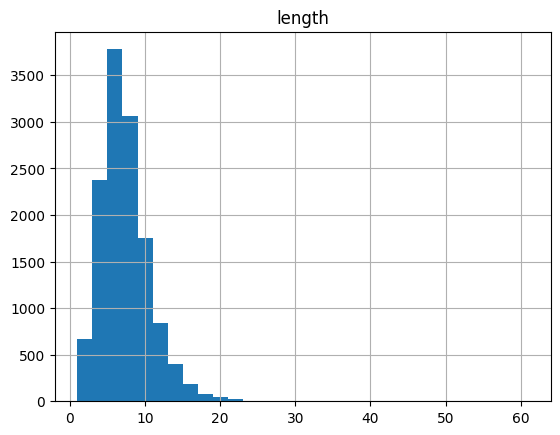

In [9]:
df_train.hist("length", bins=30);